In [12]:
import numpy
import matplotlib.pyplot as mp
from mpl_toolkits import basemap
import netCDF4

from mpl_toolkits import axes_grid1

mp.rcParams.update({'mathtext.default': 'regular'})
% matplotlib inline

In [13]:
working_dir = '/ninod/NCAR_LENS/daily/PRECT/B1850C5CN/'

file = 'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.04020101-22001231_SUBSET.nc'

In [14]:
ncfile = netCDF4.Dataset(working_dir + file, 'r', 'NetCDF4')
prect = ncfile.variables['PRECT'][:]
lat = ncfile.variables['lat'][:]
lon = ncfile.variables['lon'][:]

prect_clim = numpy.mean(prect, axis=0)

In [15]:
def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   geo_idx = (numpy.abs(dd_array - dd)).argmin()
   return geo_idx

In [16]:
LA_lat = 34.0522
LA_lon = 118.2437 # deg west
LA_lon = 180. + (180-LA_lon)

Oroville_dam_lat = 39.5380
Oroville_dam_lon = 121.4831 # deg west
Oroville_dam_lon = 360 - Oroville_dam_lon

SF_lat = 37.7749
SF_lon = 122.4194
SF_lon = 360 - SF_lon

In [17]:
prect_clim = prect_clim*86400.*1000.

[ 30.62827225  31.57068063  32.51308901  33.45549738  34.39790576
  35.34031414  36.28272251  37.22513089  38.16753927  39.10994764
  40.05235602  40.9947644   41.93717277  42.87958115  43.82198953
  44.76439791]
30.6282722513 44.7643979058 230.0 250.0
65


/home/baird/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3435: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/baird/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3444: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


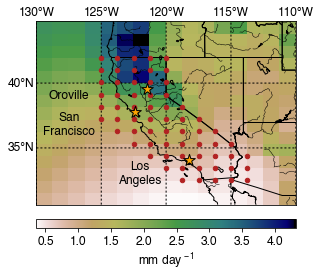

In [18]:
fontsize=12

min_lat = lat.min()
max_lat = lat.max()
middle_lat = 0.5*(lat.min() + lat.max())

min_lon = lon.min()
max_lon = lon.max()
middle_lon = 0.5*(lon.min() + lon.max())

print(lat)
print(min_lat, max_lat, min_lon, max_lon)

xi,yi = numpy.meshgrid(lon,lat)

fig = mp.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#,ax=ax

lat_indices=[2,3,4,5,6,7,8,9,10,11,12]
lon_indices=[ [9,10,11,12,13], [8,9,10,11,12,13], [7,8,9,10,11,12,13], [6,7,8,9,10,11,12], [5,6,7,8,9,10,11], [4,5,6,7,8,9,10], [4,5,6,7,8,9], [4,5,6,7,8], [4,5,6,7,8], [4,5,6,7,8], [4,5,6,7,8] ]
lon_ind_flatten = [i for subset in lon_indices for i in subset]
print(len(lon_ind_flatten))

#for lat_idx in range(len(lat_indices)):
#    prect_clim[lat_indices[lat_idx], lon_indices[lat_idx][:]] = 0

#map = basemap.Basemap(projection='mill',llcrnrlat=min_lat,urcrnrlat=max_lat,llcrnrlon=min_lon,urcrnrlon=max_lon,resolution='i') # clihf
map = basemap.Basemap(projection='cyl',ax=ax,llcrnrlat=min_lat,urcrnrlat=max_lat,llcrnrlon=min_lon,urcrnrlon=max_lon,resolution='i') # clihf

map.drawcoastlines(linewidth=1)
#map.fillcontinents(color='0.75',lake_color='0.75')
# draw parallels and meridians.
map.drawparallels([35,40], labels=[1,0,0,0], fontsize=fontsize, zorder=1)
map.drawmeridians([230,235,240,245,250], labels=[0,0,1,0], fontsize=fontsize, zorder=1)
#map.drawparallels(lat, labels=[0,0,0,0], fontsize=fontsize)
#map.drawmeridians(lon, labels=[0,0,0,0], fontsize=fontsize)

#map.drawmapboundary(fill_color='0.5')
map.drawstates(linewidth=1, color='0')
map.drawcountries(linewidth=1, color='0')
map.drawrivers(linewidth=0.5)

#prect_map = map.contourf(xi, yi, prect_clim, latlon=True, cmap='gist_earth_r')
prect_map = map.pcolormesh(xi, yi, prect_clim, latlon=True, cmap='gist_earth_r')

for lat_idx in range(len(lat_indices)):
    for lon_idx in range(len(lon_indices[lat_idx])):
        ax.scatter(y=lat[lat_indices[lat_idx]], x=lon[lon_indices[lat_idx][lon_idx]], c='firebrick', s=20, zorder=2)

ax.scatter(SF_lon, SF_lat, marker='*', s=150, c='orange', edgecolor='0', label='San Francisco', zorder=2)
ax.scatter(LA_lon, LA_lat, marker='*', s=150, c='orange', edgecolor='0', label='Los Angeles', zorder=2)
ax.scatter(Oroville_dam_lon, Oroville_dam_lat, marker='*', s=150, c='orange', edgecolor='0', label='Oroville', zorder=2)

ax.text(s='Oroville', x=232.5, y=Oroville_dam_lat, fontsize=fontsize, ha='center', va='top')
ax.text(s='San\nFrancisco', x=232.5, y=SF_lat, fontsize=fontsize, ha='center', va='top')
ax.text(s='Los\nAngeles', x=238, y=LA_lat, fontsize=fontsize, ha='center', va='top')

cbar = map.colorbar(prect_map, location='bottom', pad=0.2)
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_label(label='mm day$^{\, -1}$', fontsize=fontsize)

#ax.text(x=lon[lon_indices[0][1]], y=lat[lat_indices[0]], s='hi', ha='center', va='center', fontsize=fontsize, color='firebrick', weight='bold')
#ax.text(s='hello', x=0, y=1.03, transform=ax.transAxes, va='bottom', ha='left', fontsize=fontsize)
#map.pcolor(xi,yi,prect_clim)
#ax.scatter(35,240,s=200)
#ax.scatter(0.5,0.5,transform=ax.transAxes,s=200,zorder=3)
#map.drawmapscale(-7., 35.8, -3.25, 39.5, 500, barstyle='fancy')
#map.drawmapscale(-0., 35.8, -3.25, 39.5, 500, fontsize=fontsize)
#mp.title("Miller Cylindrical Projection")

fig.tight_layout()

fig.savefig('./figs/California_grid_boxes.pdf', transparent=True, bbox_inches='tight')

In [6]:
for lat_idx in range(len(lat_indices)):
    for lon_idx in range(len(lon_indices[lat_idx])):
        print( '['+str(lat[lat_indices[lat_idx]])+ ',' +str(lon[lon_indices[lat_idx][lon_idx]])+']'+', \\')

[32.5130890052,241.25], \
[32.5130890052,242.5], \
[32.5130890052,243.75], \
[32.5130890052,245.0], \
[32.5130890052,246.25], \
[33.4554973822,240.0], \
[33.4554973822,241.25], \
[33.4554973822,242.5], \
[33.4554973822,243.75], \
[33.4554973822,245.0], \
[33.4554973822,246.25], \
[34.3979057592,238.75], \
[34.3979057592,240.0], \
[34.3979057592,241.25], \
[34.3979057592,242.5], \
[34.3979057592,243.75], \
[34.3979057592,245.0], \
[34.3979057592,246.25], \
[35.3403141361,237.5], \
[35.3403141361,238.75], \
[35.3403141361,240.0], \
[35.3403141361,241.25], \
[35.3403141361,242.5], \
[35.3403141361,243.75], \
[35.3403141361,245.0], \
[36.2827225131,236.25], \
[36.2827225131,237.5], \
[36.2827225131,238.75], \
[36.2827225131,240.0], \
[36.2827225131,241.25], \
[36.2827225131,242.5], \
[36.2827225131,243.75], \
[37.2251308901,235.0], \
[37.2251308901,236.25], \
[37.2251308901,237.5], \
[37.2251308901,238.75], \
[37.2251308901,240.0], \
[37.2251308901,241.25], \
[37.2251308901,242.5], \
[38.1

In [7]:
for lat_idx in range(len(lat_indices)):
    for lon_idx in range(len(lon_indices[lat_idx])):
        print( '['+str(lat_indices[lat_idx])+ ',' +str(lon_indices[lat_idx][lon_idx])+']'+', \\')

[2,9], \
[2,10], \
[2,11], \
[2,12], \
[2,13], \
[3,8], \
[3,9], \
[3,10], \
[3,11], \
[3,12], \
[3,13], \
[4,7], \
[4,8], \
[4,9], \
[4,10], \
[4,11], \
[4,12], \
[4,13], \
[5,6], \
[5,7], \
[5,8], \
[5,9], \
[5,10], \
[5,11], \
[5,12], \
[6,5], \
[6,6], \
[6,7], \
[6,8], \
[6,9], \
[6,10], \
[6,11], \
[7,4], \
[7,5], \
[7,6], \
[7,7], \
[7,8], \
[7,9], \
[7,10], \
[8,4], \
[8,5], \
[8,6], \
[8,7], \
[8,8], \
[8,9], \
[9,4], \
[9,5], \
[9,6], \
[9,7], \
[9,8], \
[10,4], \
[10,5], \
[10,6], \
[10,7], \
[10,8], \
[11,4], \
[11,5], \
[11,6], \
[11,7], \
[11,8], \
[12,4], \
[12,5], \
[12,6], \
[12,7], \
[12,8], \


In [8]:
ca_latlon_array = (( \
[32.5130890052,241.25], \
[32.5130890052,242.5], \
[32.5130890052,243.75], \
[32.5130890052,245.0], \
[32.5130890052,246.25], \
[33.4554973822,240.0], \
[33.4554973822,241.25], \
[33.4554973822,242.5], \
[33.4554973822,243.75], \
[33.4554973822,245.0], \
[33.4554973822,246.25], \
[34.3979057592,238.75], \
[34.3979057592,240.0], \
[34.3979057592,241.25], \
[34.3979057592,242.5], \
[34.3979057592,243.75], \
[34.3979057592,245.0], \
[34.3979057592,246.25], \
[35.3403141361,237.5], \
[35.3403141361,238.75], \
[35.3403141361,240.0], \
[35.3403141361,241.25], \
[35.3403141361,242.5], \
[35.3403141361,243.75], \
[35.3403141361,245.0], \
[36.2827225131,236.25], \
[36.2827225131,237.5], \
[36.2827225131,238.75], \
[36.2827225131,240.0], \
[36.2827225131,241.25], \
[36.2827225131,242.5], \
[36.2827225131,243.75], \
[37.2251308901,235.0], \
[37.2251308901,236.25], \
[37.2251308901,237.5], \
[37.2251308901,238.75], \
[37.2251308901,240.0], \
[37.2251308901,241.25], \
[37.2251308901,242.5], \
[38.167539267,235.0], \
[38.167539267,236.25], \
[38.167539267,237.5], \
[38.167539267,238.75], \
[38.167539267,240.0], \
[38.167539267,241.25], \
[39.109947644,235.0], \
[39.109947644,236.25], \
[39.109947644,237.5], \
[39.109947644,238.75], \
[39.109947644,240.0], \
[40.0523560209,235.0], \
[40.0523560209,236.25], \
[40.0523560209,237.5], \
[40.0523560209,238.75], \
[40.0523560209,240.0], \
[40.9947643979,235.0], \
[40.9947643979,236.25], \
[40.9947643979,237.5], \
[40.9947643979,238.75], \
[40.9947643979,240.0], \
[41.9371727749,235.0], \
[41.9371727749,236.25], \
[41.9371727749,237.5], \
[41.9371727749,238.75], \
[41.9371727749,240.0] ))

numpy.save('ca_latlon_array.npy', ca_latlon_array)

In [9]:
ca_latlon_regional_indices_array = numpy.array(( \
[2,9], \
[2,10], \
[2,11], \
[2,12], \
[2,13], \
[3,8], \
[3,9], \
[3,10], \
[3,11], \
[3,12], \
[3,13], \
[4,7], \
[4,8], \
[4,9], \
[4,10], \
[4,11], \
[4,12], \
[4,13], \
[5,6], \
[5,7], \
[5,8], \
[5,9], \
[5,10], \
[5,11], \
[5,12], \
[6,5], \
[6,6], \
[6,7], \
[6,8], \
[6,9], \
[6,10], \
[6,11], \
[7,4], \
[7,5], \
[7,6], \
[7,7], \
[7,8], \
[7,9], \
[7,10], \
[8,4], \
[8,5], \
[8,6], \
[8,7], \
[8,8], \
[8,9], \
[9,4], \
[9,5], \
[9,6], \
[9,7], \
[9,8], \
[10,4], \
[10,5], \
[10,6], \
[10,7], \
[10,8], \
[11,4], \
[11,5], \
[11,6], \
[11,7], \
[11,8], \
[12,4], \
[12,5], \
[12,6], \
[12,7], \
[12,8] ))

numpy.save('ca_latlon_regional_indices_array.npy', ca_latlon_regional_indices_array)

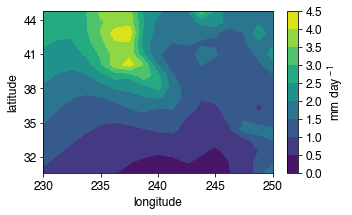

In [10]:
fontsize=12
fig = mp.figure(figsize=(5,5))

ax = fig.add_subplot(111)
ax.set_aspect('equal')
c = ax.contourf(lon, lat, prect_clim)

divider = axes_grid1.make_axes_locatable(ax)
cbar_axes = divider.append_axes('right', size='5%', pad=0.2)
cbar = fig.colorbar(c, cbar_axes)
cbar.ax.tick_params(labelsize=fontsize)
cbar.ax.set_ylabel('mm day$^{\, -1}$', fontsize=fontsize)

ax.tick_params(labelsize=fontsize)
ax.set_xticks([230,235,240,245,250])
ax.set_yticks([32,35,38,41,44])
ax.set_ylabel('latitude', fontsize=fontsize)
ax.set_xlabel('longitude', fontsize=fontsize)

mp.tight_layout()

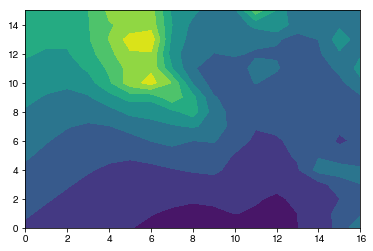

In [11]:
mp.contourf(prect_clim)

In [ ]:
m = basemap.Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.shadedrelief()